Coefficients: 
 [ 941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


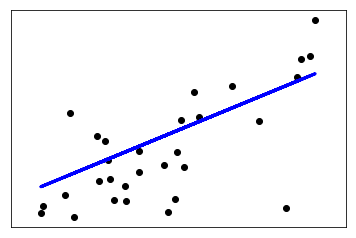

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" 
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

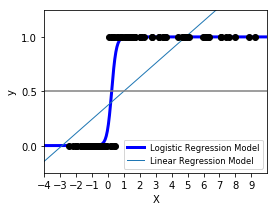

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# This is the test set, it's a straight line with some Gaussian noise
xmin, xmax = -10, 10
n_samples = 100
np.random.seed(0)
X = np.random.normal(size = n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size = n_samples)
X = X[:, np.newaxis]

# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize = (4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-10, 10, 300)
def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-10, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
loc="lower right", fontsize='small')
plt.show()

In [11]:
#Starting implementation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import tree
df = pd.read_csv("iris_df.csv")
df.columns = ["X1", "X2", "X3","X4", "Y"]
df.head()

#implementation
from sklearn.cross_validation import train_test_split
decision = tree.DecisionTreeClassifier(criterion="gini")
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
decision.fit(trainX, trainY)
print("Accuracy: \n", decision.score(testX, testY))

Accuracy: 
 0.955555555556


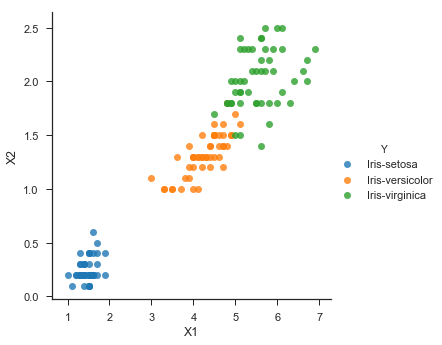

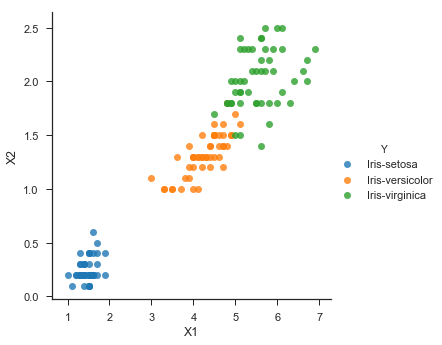

In [4]:
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('iris_df.csv')
df.columns = ['X4', 'X3', 'X1', 'X2', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()
from sklearn.cross_validation import train_test_split
support = svm.SVC()
X = df.values[:, 0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
sns.set_context('notebook', font_scale=1.1)
sns.set_style('ticks')
sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()
from sklearn.cross_validation import train_test_split
forest = RandomForestClassifier()
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)

Accuracy: 
 1.0
